In [1]:
%autosave 0

Autosave disabled


# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

1. The smartcab deos not move. No inputs are processed and no actions are being taken in the code, so the cab stays put.

2. The cab receives points, +ve for correct or acceptable behavior, -ve for dangerous behavior and also missing the correct actions.

3. Safe actions at a red light (not moving) are rewarded +ve points, while time-wasting actions (that delay the cab) are rewarded -ve points.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

* The behavior of the cab in `agent.py` is controlled by the `learning, epsilon and alpha` parameters.
 * `learning` if the cab is in the learning mode or not. In learning mode, its actions influence its decisions in the next round.
 * `epsilon` is a random exploration factor, for evaluating prob of taking different actions
 * `alpha` is the learning rate, with default set to 0.5
* In the `environent.py` the `act(agent, action)` causes the agent to consider an action and perform the action if it is legal. Receive a reward for the agent based on traffic laws.
* In the `simulator.py`, the `render_text` is the non-GUI render display of the simulation that writes the simulated trial data to the terminal/command prompt. The `render` function, on the other hand, is the GUI render display of the simulation, i.e. updates the simulation screen. 
* The `planner.py` is the route planner object, and considers the _E-W_ direction before considering the _N-S_ orientation.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


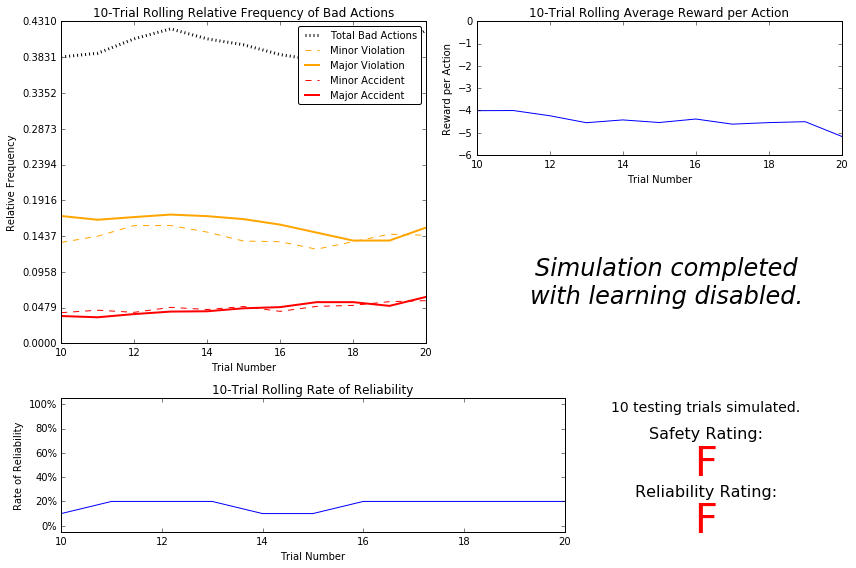

In [32]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

* The driving agent seems to be making bad decisions approximately 40% of the times. About 11% of the total actions seemed to have caused accidents (~6% Major, 5% Minor).
 * Seems that different runs give differing graphs, but within the same limits of randomness.
* Given that the agent is driving randomly, this is expected. Since a decision can either be good or bad, about 50% decisions are expected to be bad.
* The agent does receive heavy penalties for its actions. A cursory glance at the csv indicates the agent received more than 100 negative points, nearly half the time.
* No, as the number of trials increases, the outcome does not change, within the limits of statistical error.
* Absolutely not. The agent has a 5% chance of reaching the destination (1 in 20 was succesful), with a 10% chance of accidents is unacceptable.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

**Safety:**  is largely governed by the `inputs` feature. Based on the color of the light and positions and directions of the other vehicles, the _Smartcab_ will decide on the next action.

**Efficiency** of the _Smartcab_ is dependent on both the `waypoint` and the `deadline` features, for the direction  of the next action, and to estimate time remaining. 

Typically though, during learning, `deadline` is not really important, since the learning has to be rewards-driven. Also, the `inputs.light` does have a bearing on the efficiency, as no attempt to move should be done on a red-light, while appropriate movement action _must_ be taken on a green light. The `inputs.right` does not affect either learning or efficiency, since all traffic _must_ yield to traffic on its left.

<br><br>

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Lets first put down the options available for each of the features.

* A `waypoint` : 3 (forward, left, right)
* B `inputs.light` : 2 (red, green)
* C `inputs.right` : Not relevant
* D `inputs.left` : 4 (None, forward, left, right)
* E `inputs.oncoming` : 4 (None, forward, left, right)

Possible number of states = A <span style="font-size:10px">x</span> B <span style="font-size:10px">x</span> C <span style="font-size:10px">x</span> D <span style="font-size:10px">x</span> E. 

Since C is not relevant, we will use A <span style="font-size:10px">x</span> B <span style="font-size:10px">x</span> D <span style="font-size:10px">x</span> E.

    States = 3 x 2 x 4 x 4 = 96
    
For each of these states, we have potentially 4 actions. Thus the total number of `variables` to learn are `96 x 4 = 384`

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

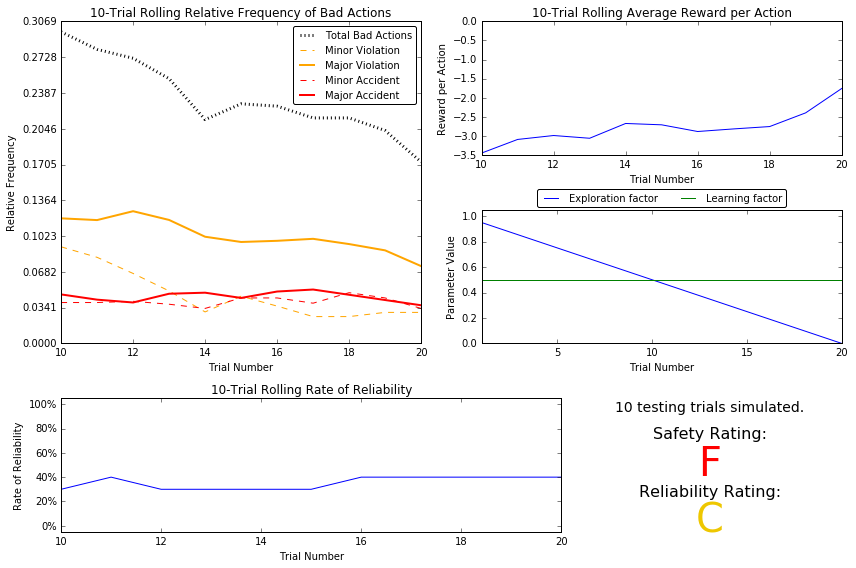

In [83]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

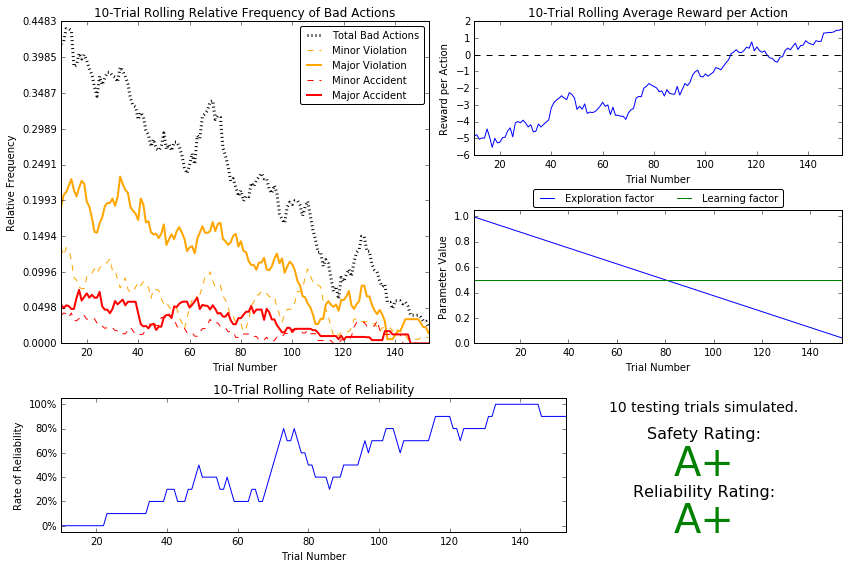

In [79]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.160.csv')

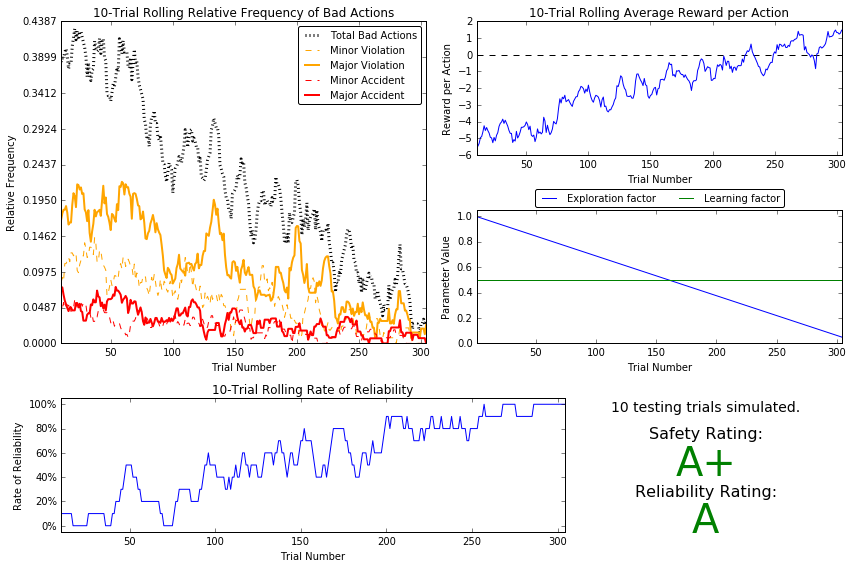

In [80]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.320.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

* There don't seem to be much similarity between the basic driving agent and the Q-Learning agent. Specifically, the rate of bad actions taken, which was stable around 40% for basic agent, now continuously decreases with each iteration, down to about 5% in some runs.

* The agent went through 20 trials before starting tests. This makes sense, since we had kept the $\epsilon$ at 1, and reduced that by 0.05 each time around.

* Yes, the value of $\epsilon$ is represented correctly.

* Yes. Setting the $\epsilon$ decrement to 0.025 causes 40 training runs. While even 80 training runs were not particularly of help in decreasing the bad actions below a certain threshold (5%), but the average reward did increase above (0.0 / action), as compared to 20-training run experiments. Additionally, the number of possible states covered was quite less (73 - 77) with 20 trials, but seemed to reach above 90 as the trial runs increased. This seemed to reflect in the increased reliability of the testing runs.

* While the safety factor does not significantly change (stays F mostly, but did reach C in one other trial), the reliability factor does swing between F to A+, and for about 2 dozen observations, seemed to have mode as D)


The number of states covered with the increasing trial runs seems to make the cab more reliable, but not truly safe as there is at least one major accident.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. 

For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*.

When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.


### Some thoughts on the Q-values and chosen action

It makes sense to check the `choose_action()`. Currently we pick up the action with the lowest Q, but without regards to the required waypoint. 

It might be interesting to check if 
1. picking the waypoint over the least Q could be helpful, or 
2. trying to understand why state like ('right', 'red', 'forward', 'left') has Q like  {'forward': -20.31, 'right': -9.85, None: 0, 'left': 0}, which seems obviously wrong. (you ___cannot___ take left on a red light)

_Some sort of a visualization state-vs-action would be nice to have._

For 96 states, with 4 possible actions, we need a minimum of 96 x 4 = 384 distinct observations. However, given the fact that we choose a random action only with probability $\epsilon$, and as that is a linearly decreasing quantity, the chances that _all_ states will be covered by just 20 trials is small. 

At a certain point, we expect have a leveling off, and that is observed.
1. Observation: when &epsilon; decays by 0.00625, (160 trials, 1421 random actions, 1124 min-Q's) covers 93 states out of 96, bad actions about 5%.
2. Observation: when &epsilon; decays by 0.003125, (320 trials, 3169 random actions, 2335 min-Q's) covers all 96 states, bad actions about 4%.

In both the cases though, the **safety _and_ reliability** seem to improve a lot.

Adding logic to `choose_action()` is not the appropriate way to go for ML, it is more of an expert system approach. The correct approach for an ML system is to provide the learner more observations. This is also borne out by the observations that **more learning trials** lead to better performance on testing trials.
<p>

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

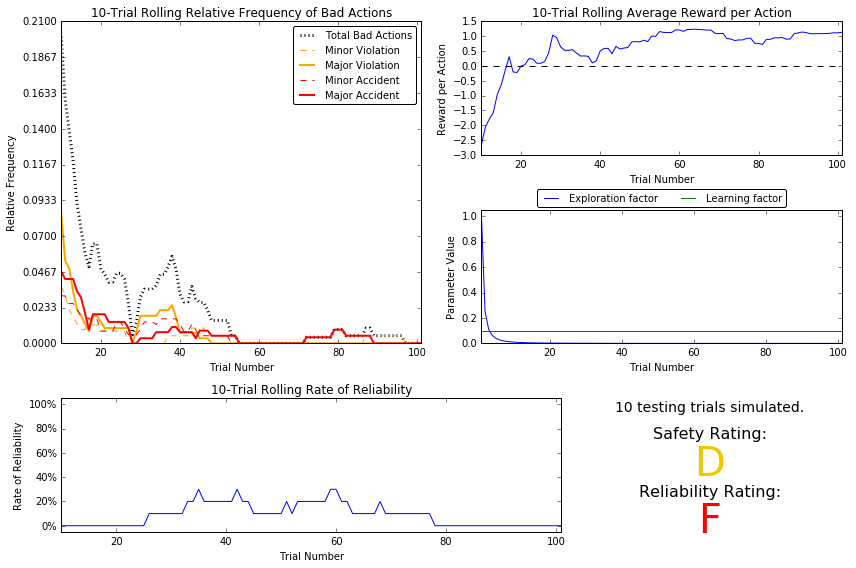

In [132]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

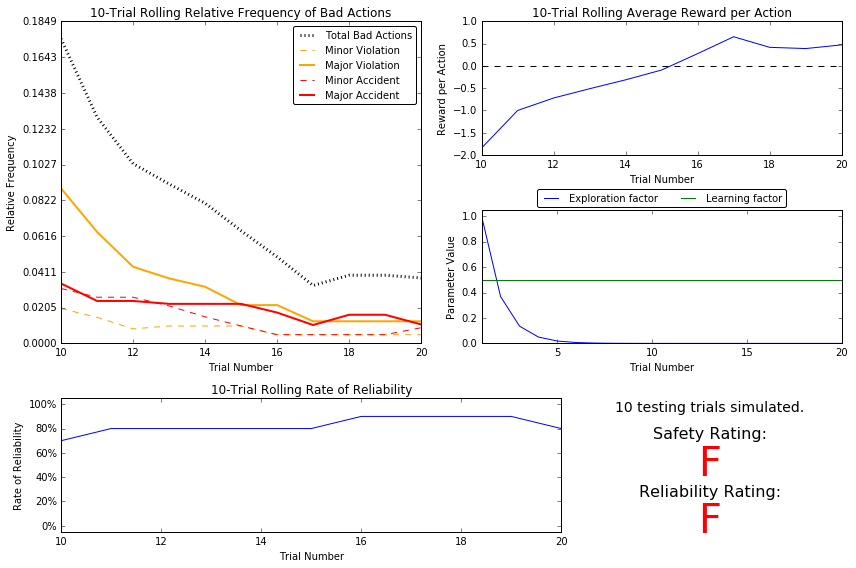

In [123]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.e^-at.csv')

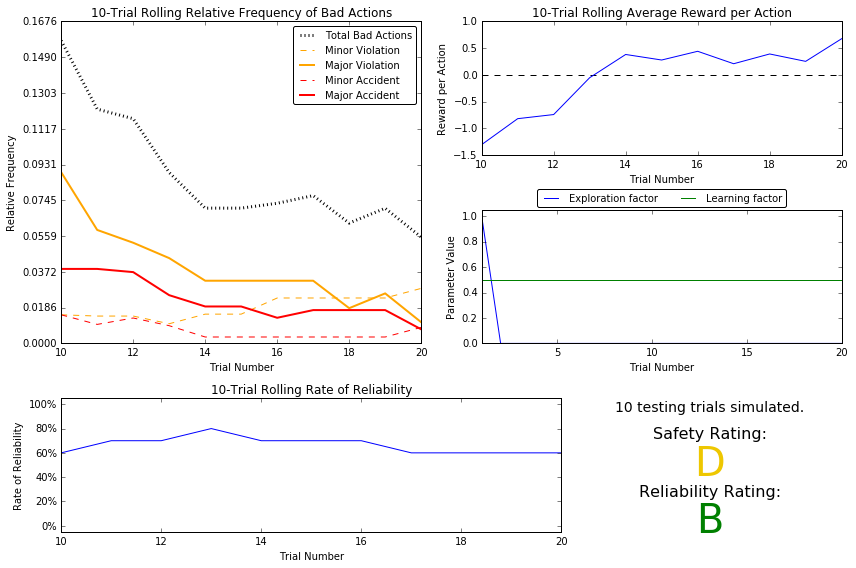

In [124]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.at^-2.csv')

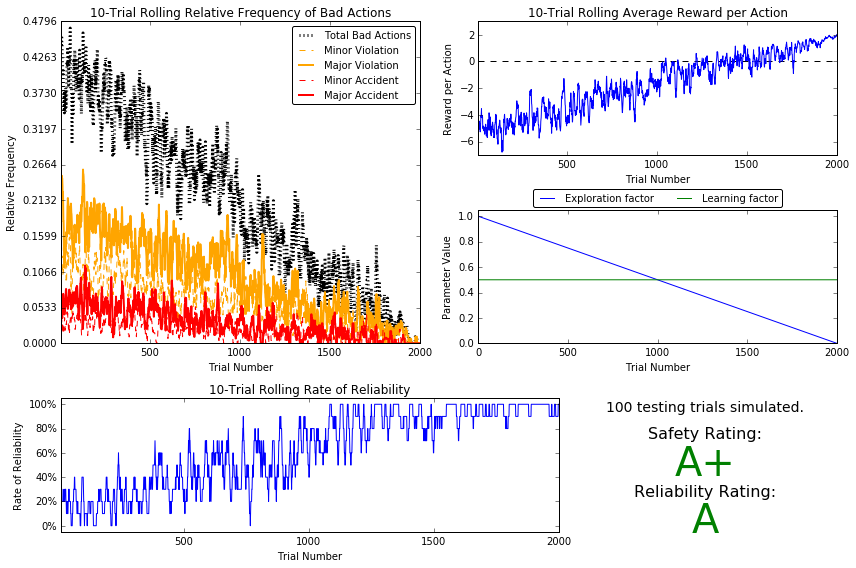

In [122]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning-lin.2k.csv')

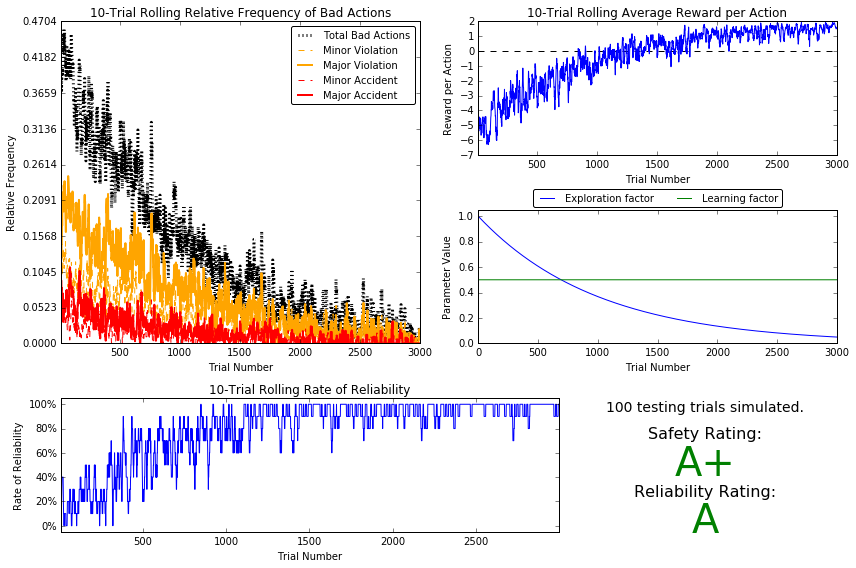

In [121]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.a^t.3k.csv')

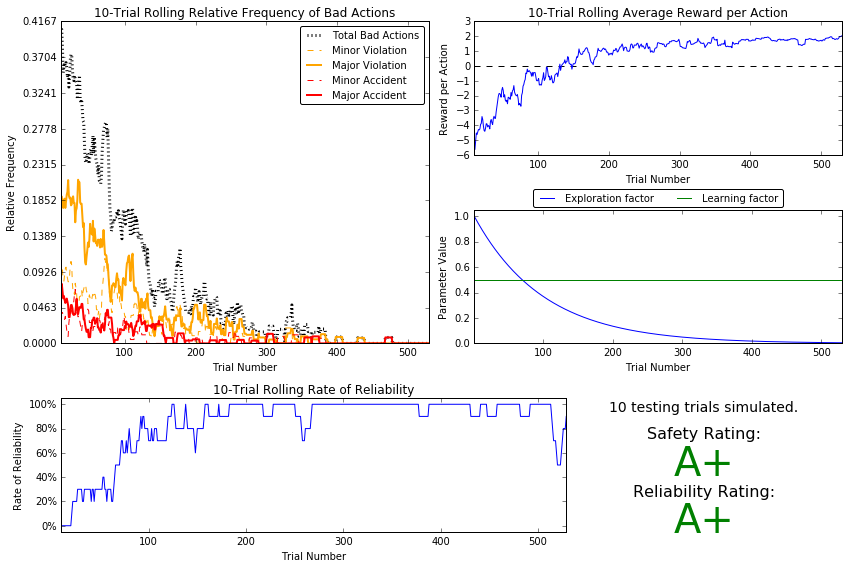

In [120]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.a^t.500.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

1. I used different functions as noted above. Specifically I cycled through $$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$ as required in the question. For a few initial runs, I used the value of a as `random.random()`, but sometimes it was too low, < 0.5, when the results did not show up well.

2. Some functions decayed below the threshold value very fast, and there were only 20 training trials that were performed. This was too low, and it reflected in the testing scores.

3. I used $\epsilon$ as 1 for most times, and also varied the  $\alpha$ from 0.01 to 0.9. The $\epsilon$ was kept near 1 because many of the decaying functions decayed too rapidly, and fell below the threshold before 20 trials were over. The learning rate $\alpha$ seemed to have a weighing on the reliability of the testing runs, with lower rates corresponding to lower reliabilities, but the reliability not significantly increasing for values of $\alpha$ above 0.5.

4. The testing scores significantly increased with increasing number of training runs. Training runs of 20 were inadequate for a decent performance, but as the scores increased very fast in the range of 100-600, and seemed to plateau off to consistently least A,  at and above 1000 runs. This was a big improvement over the near consistent F's that the default Q-learner got with only 20 training runs.

5. Yes, the Q-learner did succesfully learn the appropriate policy.

6. Yes. With 2000+ run trainings, the smartcab seems perfectly set for a safe and reliable ride.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

* **Optimal Policy Explanation** 

The policy for going forward is simple, go if green, stop if red. However, the policy for turns is a bit nuanced. The easier one can be rephrased as 'free right turn, yield to left', which means, freely go right if the light is green and there's no traffic coming straight from the left, but yield to the traffic coming from left. The trickier one is for turning left. There is no left turn when the light is red. When the light is green, the agent must wait in the intersection for oncoming traffic to clear off, and then make the right turn.

| No. | Waypoint | Light | Traffic (L, O) | Action | Policy |
|-----|----------|-------|----------------|--------|--------|
| 1 | forward | red | None, None | None | optimal |
| 2 | forward | red | None, None | forward | incorrect |
| 3 | forward | red | None, None | left | incorrect |
| 4 | forward | red | None, None | right | sub-optimal |
| 5 | right | red | None, None | None | sub-optimal |
| 6 | right | red | None, None | forward | incorrect |
| 7 | right | red | None, None | left | incorrect |
| 8 | right | red | None, None | right | optimal |
| 9 | right | red | forward, None | None | optimal |
|10 | right | red | forward, None | forward | incorrect |
|11 | right | red | forward, None | left | incorrect |
|12 | right | red | forward, None | right | sub-optimal |
|13 | right | green | forward, None | None | incorrect |
|14 | right | green | forward, None | forward | sub-optimal |
|15 | right | green | forward, None | left | sub-optimal |
|16 | right | green | forward, None | right | incorrect |
|17 | left | green | forward, forward | None | optimal |
|18 | left | green | forward, forward | forward | sub-optimal |
|19 | left | green | forward, forward | left | incorrect |
|20 | left | green | forward, forward | right | sub-optimal |


* **Optimal Policy Discussion**

Since we have run multiple trials, let's examine the `sim_improved-learning.a^t.500.txt` file. This is because other policy files, esp with just 20 trial runs did not have all the 96 states in the policy. With more than hundred training runs, the size of the states in the file reaches to 96.

As the agent learns, there are differing concerns related to the policy. There are many states where the policy is correct for the given state, but there are also some where the action, while not a violation of the traffic law, is not the most optimal response to the road-situation.

**Key: (waypoint, light, left_traffic, oncoming_traffic), -- action : reward**

* **Optimal Strategies** These are optimal because these strategies have highest weightage for the action that an optimal human driver would perform with the agent(car).

('left', 'green', 'forward', 'left')
 -- forward : 0.89
 -- right : 0.00
 -- None : -4.41
 -- left : 1.67

('forward', 'red', None, 'forward')
 -- forward : -10.17
 -- right : 0.68
 -- None : 2.42
 -- left : -10.75

('right', 'red', None, None)
 -- forward : -10.15
 -- right : 1.77
 -- None : 0.14
 -- left : -14.16

('right', 'green', 'right', 'forward')
 -- forward : 0.09
 -- right : 1.58
 -- None : 0.00
 -- left : -14.89

('left', 'red', 'right', 'right')
 -- forward : 0.00
 -- right : 0.17
 -- None : 1.91
 -- left : 0.00

('forward', 'red', 'right', 'right')
 -- forward : 0.00
 -- right : 0.55
 -- None : 2.19
 -- left : 0.00

('right', 'green', 'left', 'right')
 -- forward : 0.14
 -- right : 2.56
 -- None : 0.00
 -- left : -14.87

('left', 'red', None, 'forward')
 -- forward : -25.22
 -- right : 0.60
 -- None : 1.39
 -- left : -9.91

('forward', 'red', None, 'right')
 -- forward : -9.09
 -- right : 0.26
 -- None : 1.79
 -- left : -30.13

('forward', 'green', 'right', 'left')
 -- forward : 0.00
 -- right : 0.00
 -- None : -3.44
 -- left : 1.18

('left', 'green', 'left', 'forward')
 -- forward : 0.41
 -- right : 0.93
 -- None : -3.94
 -- left : -9.51

('right', 'red', None, 'left')
 -- forward : -13.51
 -- right : 2.03
 -- None : 0.76
 -- left : -25.51

* **Suboptimal Strategies :** These are suboptimal because they either force the agent off the most-direct path to the destination, or do not suggest an action that takes the agent closer to its destination.

('right', 'red', 'right', 'forward')
 -- forward : 0.00
 -- right : 0.00
 -- None : 1.56
 -- left : -5.26

('left', 'green', 'left', 'left')
 -- forward : 0.92
 -- right : 0.36
 -- None : 0.00
 -- left : 0.00

('right', 'green', 'forward', 'right')
 -- forward : 0.11
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00

('left', 'green', 'right', 'right')
 -- forward : 0.35
 -- right : -0.15
 -- None : 0.00
 -- left : -9.67

 ('forward', 'green', 'right', 'forward')
 -- forward : 0.00
 -- right : 0.76
 -- None : 0.00
 -- left : 0.00

('left', 'green', 'forward', 'right')
 -- forward : 1.49
 -- right : 0.20
 -- None : 0.00
 -- left : -15.13

('forward', 'red', 'right', 'forward')
 -- forward : -5.34
 -- right : 1.24
 -- None : 0.00
 -- left : -8.97

('right', 'green', 'forward', 'forward')
 -- forward : 1.58
 -- right : 0.00
 -- None : -4.30
 -- left : -10.30

('left', 'green', None, 'right') -- suboptimal
 -- forward : 0.46
 -- right : 0.13
 -- None : -4.83
 -- left : -19.44







-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

1. Location agnostic states. The states do not contain the cab location wrt the destination, and hence the Smartcab only can follow directions based on the waypoints that the environment provides. 
2. No _Forward calculation_: in the absence of a _forward calculation_ to the destination it is not very easy to assess the impact on the rewards for not following a waypoint _vs_ acting according to the rules.
3. Randomness of destination: Since the environment randomly decides the destination for each trial,a simple metric based only on the destination will not be a good candidate for the Q calculation,as each state will need to have these values for each destination, leading to exponential explosion of states.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.